## Parameters

In [1]:
# ------- PARAMETERS ------- #

RUNS = [155]     # run indexes

root = '/pnfs/pic.es/data/cta/LST/LST3/Data/ZFITS/' # path to all folders with the .zfits files

# -------------------------- #

# other parameters
subrun = 0                    # subrun we are going to analyse

graphs_format = 'pdf'         # file format of images
dir_files     = 'csv_files/'  # path (relative or absolute) to the .csv files that will be created
dir_graphs    = 'graphs/'

### Packages and some definitions

In [2]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np

from ctapipe.visualization import CameraDisplay
from ctapipe.coordinates   import EngineeringCameraFrame
from traitlets.config      import Config
from ctapipe.io            import EventSource

import auxiliar as aux
aux.parameters()

# extracting the number of LST
LST_camera = aux.find_LST_num(root) 

# creating the folder if dont exist
aux.create_folder(dir_files)        
aux.create_folder(dir_graphs)

# getting geometry of the camera
date, subruns = aux.search(root,RUNS[0])    
config  = Config({'LSTEventSource': {'default_trigger_type': 'ucts','allowed_tels': [1],
                                    'min_flatfield_adc': 3000,'min_flatfield_pixel_fraction': 0.8,},})  

path    = root + date + '/'
path    = path + 'LST-' + LST_camera + '.1.Run' + str(RUNS[0]).zfill(5) + '.' + str(0).zfill(4) + '.fits.fz'
source  = EventSource(input_url=path, config=config)
camgeom = source.subarray.tel[1].camera.geometry
LSTgeom = camgeom.transform_to(EngineeringCameraFrame())

### Calculating and plotting

Analysisng Run 155- Subrun 0

Reading CSV...
Finished



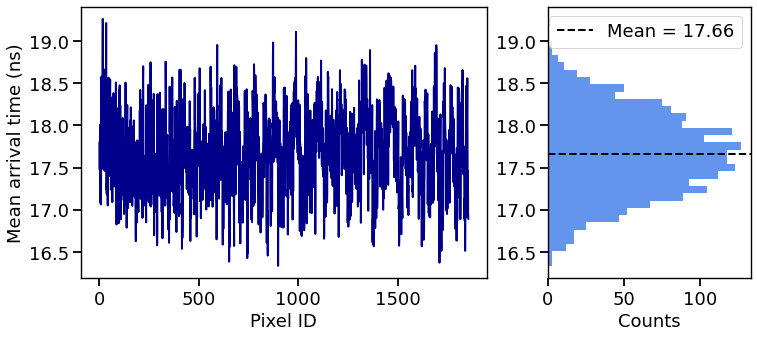

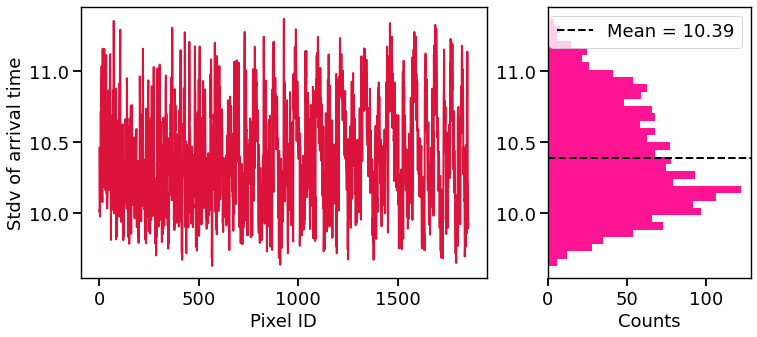

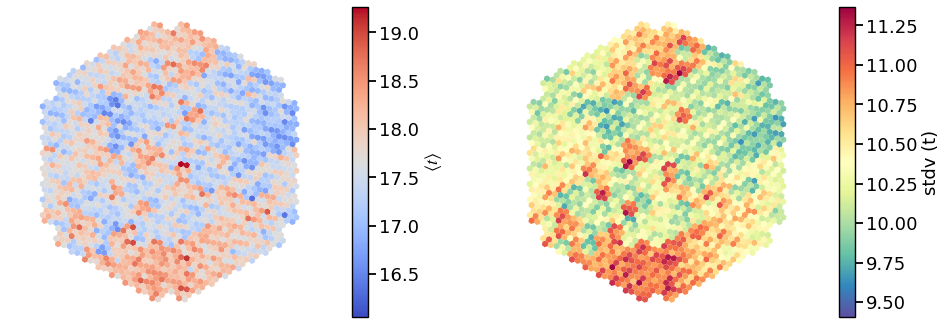

In [3]:
for RUN in RUNS:

    print('Analysisng Run ' + str(RUN) + '- Subrun ' + str(subrun) + '\n')
    
    # ----- data extraction ----- #
    path        = dir_files + 'data_tRes_Run' + str(RUN) + '_Subrun' + str(subrun) + '.csv'
    tPeak, time = aux.readTimeResCSV(path)

    
    # --- mean value for each pixel --- #
    tPeakM = [np.mean(tPeak[px]) for px in range(1855)]
    tPeakS = [np.std(tPeak[px])  for px in range(1855)]
    
    # ----------- pedestal ----------- #
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios':[4, 2]})

    # ax1 pedestal values -------------
    ax1.plot(tPeakM, color='darkblue')
    ax1.set_ylabel('Mean arrival time (ns)')
    ax1.set_xlabel('Pixel ID')

    # ax2 histogram ------------------
    ax2.hist(tPeakM, bins=34, histtype='stepfilled', orientation='horizontal', color='cornflowerblue')
    ax2.axhline(np.mean(tPeakM), color='k', linestyle='--', label='Mean = ' + str(round(np.mean(tPeakM), 2)))
    ax2.set_xlabel('Counts')
    ax2.legend()

    savename = dir_graphs + 'tRes_mean_Run' + str(RUN) + '_subrun' + str(subrun)
    plt.savefig(savename + '.' + graphs_format, format=graphs_format, bbox_inches='tight')
    plt.show()
    # ----------------------------------- #
    
    # ------------- stdv -------------- #
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios':[4, 2]})

    # ax1 stdv values -------------
    ax1.plot(tPeakS, color='crimson')
    ax1.set_ylabel('Stdv of arrival time')
    ax1.set_xlabel('Pixel ID')

    # ax2 histogram ---------------
    ax2.hist(tPeakS, bins=34, histtype='stepfilled', orientation='horizontal', color='deeppink')
    ax2.axhline(np.mean(tPeakS), color='k', linestyle='--', label= 'Mean = ' + str(round(np.mean(tPeakS), 2)))
    ax2.set_xlabel('Counts')
    ax2.legend()
    
    savename = dir_graphs+'tRes_stdv_Run'+str(RUN)+'_subrun'+str(subrun)
    plt.savefig(savename + '.' + graphs_format, format=graphs_format, bbox_inches='tight')
    plt.show()    
    # -------------------------------- #
    
    # ------ camera plot ------ #
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5.7))


    image, norm, cmap = tPeakM, colors.CenteredNorm(np.mean(tPeakM)), 'coolwarm'
    camdisplay = CameraDisplay(LSTgeom, ax=ax1, image=image, norm=norm, show_frame=False, cmap=cmap, title='')
    camdisplay.add_colorbar(label='$\\langle t \\rangle$')
    ax1.set_axis_off()
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    
    image, norm, cmap = tPeakS, colors.CenteredNorm(np.mean(tPeakS)), 'Spectral_r'
    camdisplay = CameraDisplay(LSTgeom, ax=ax2, image=image, norm=norm, show_frame=False, cmap=cmap, title='')
    camdisplay.add_colorbar(label='stdv (t)')
    ax2.set_axis_off()
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    savename = dir_graphs + 'cameraPlot_tRes_Run' + str(RUN) + '_subrun' + str(subrun)
    plt.savefig(savename + '.' + graphs_format, format=graphs_format, bbox_inches='tight')  
    plt.show()
    # ------------------------- #    
    